# Pair Programming Intro Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Buscar un conjunto de datos a analizar:

In [2]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# número de filas y columnas del dataframe

df.shape

(1338, 7)

In [4]:
# información general del dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
# No tenemos valores nulos

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Tenemos un valor duplicado

df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True) #Lo eliminamos para que no de informacion redundante

In [9]:
df.shape

(1337, 7)

In [11]:
numericas = df.select_dtypes(include=['int64', 'float64']) #Miramos nuestras columnas numéricas
numericas.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


Ahora miramos los outlayers:

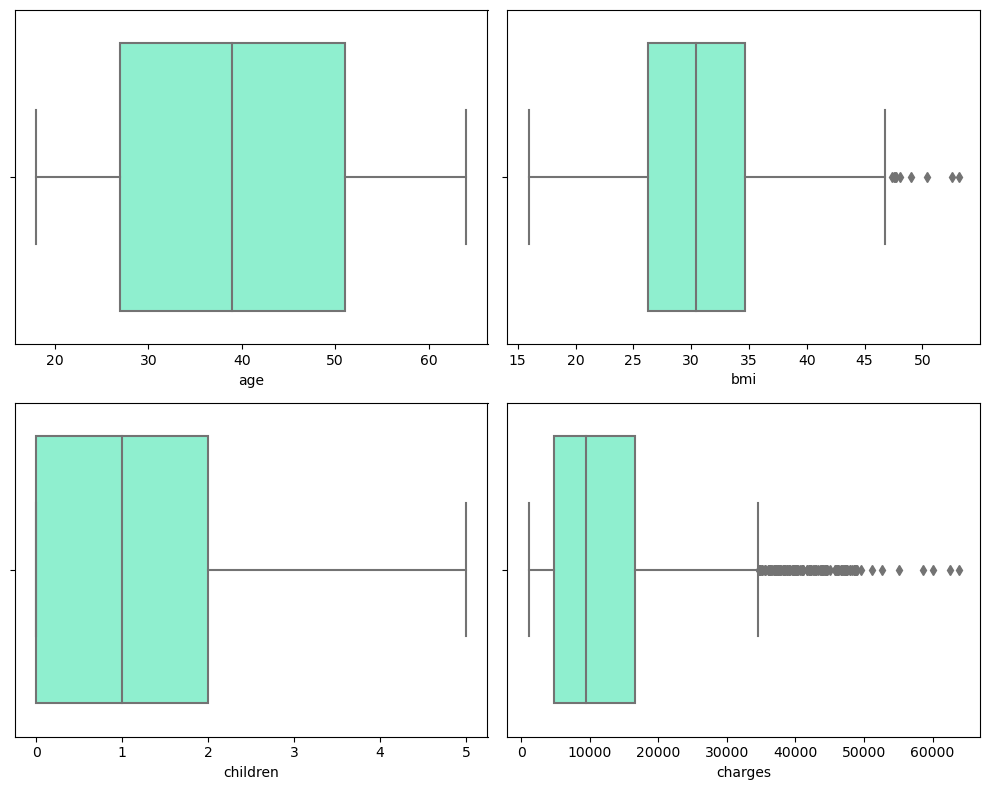

In [12]:
fig, axes = plt.subplots(2,2, figsize=(10,8))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
plt.show()

## Gestión de outlayers: 

Hay muchos outlayers en la columna 'charges'. Vamos a ver si siguen algún patrón:

In [13]:
Q1 = np.percentile(df['charges'], 25)
Q1

4746.344

In [14]:
Q3 = np.percentile(df['charges'], 75)
Q3

16657.71745

In [15]:
IQR = Q3 - Q1
IQR

11911.37345

In [16]:
outlier_step = 1.5 * IQR
outlier_step

17867.060175

In [17]:
outliers_data = df[(df["charges"] < Q1 - outlier_step) | (df['charges'] > Q3 + outlier_step)]

In [18]:
outliers_data.head(10)

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.75770
19,30,male,35.30,0,yes,southwest,36837.46700
23,34,female,31.92,1,yes,northeast,37701.87680
29,31,male,36.30,2,yes,southwest,38711.00000
30,22,male,35.60,0,yes,southwest,35585.57600
34,28,male,36.40,1,yes,southwest,51194.55914
38,35,male,36.67,1,yes,northeast,39774.27630
39,60,male,39.90,0,yes,southwest,48173.36100
49,36,male,35.20,1,yes,southeast,38709.17600
53,36,male,34.43,0,yes,southeast,37742.57570


In [19]:
outliers_data['smoker'].value_counts()

yes    136
no       3
Name: smoker, dtype: int64

Parece que los outlayers representan a los fumadores. Dividimos el DF entre fumadores y no fumadores para dejar los outlayers a parte.

In [20]:
df_fumadores = df[df['smoker'] != 'no']

In [21]:
df_fumadores.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [22]:
df_nofumadores = df[df['smoker'] != 'yes']

Nos quedamos solo con los no fumadores por lo que en principio no deberiamos tener tantos outliers, aun asi lo comprobamos con un boxplot.

In [23]:
df_nofumadores.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [24]:
df_numericas_nofumadores = df_nofumadores.select_dtypes(include=np.number) #Seleccionamos nuestras numéricas
df_numericas_nofumadores.head(2)

,age,bmi,children,charges
1,18,33.77,1,1725.5523
2,28,33.00,3,4449.4620


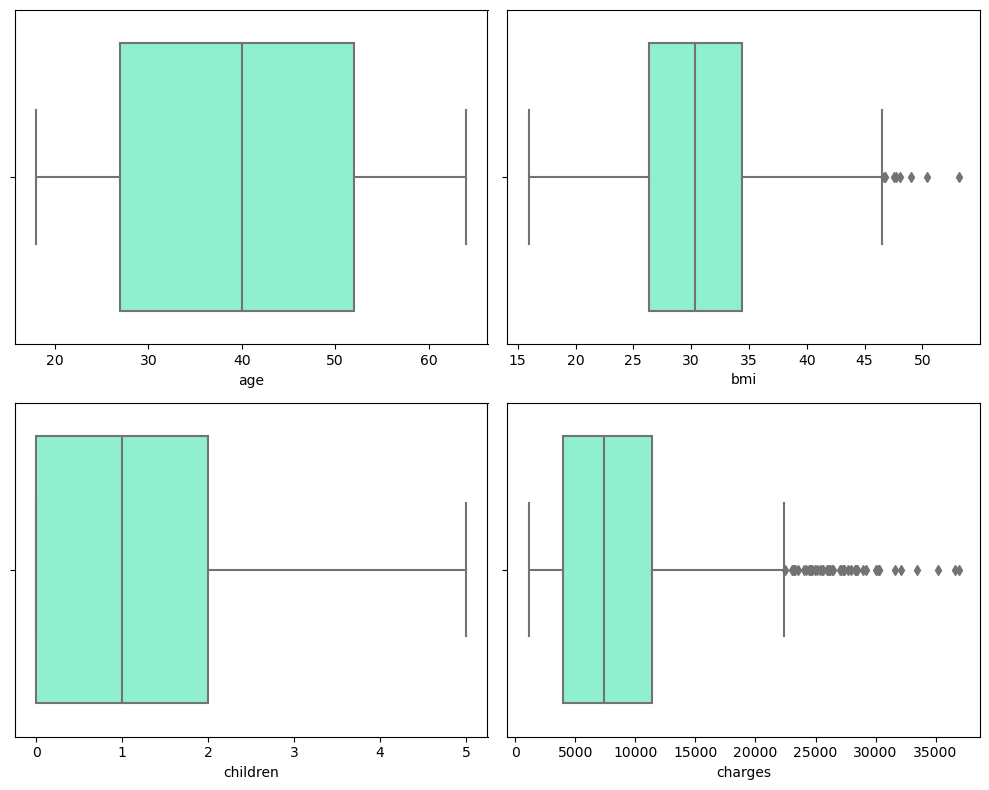

In [26]:
fig, axes = plt.subplots(2,2, figsize=(10,8))

axes = axes.flat

for indice, columna in enumerate(df_numericas_nofumadores.columns):
    sns.boxplot(x = df_numericas_nofumadores[columna], data = df_numericas_nofumadores, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
plt.show()

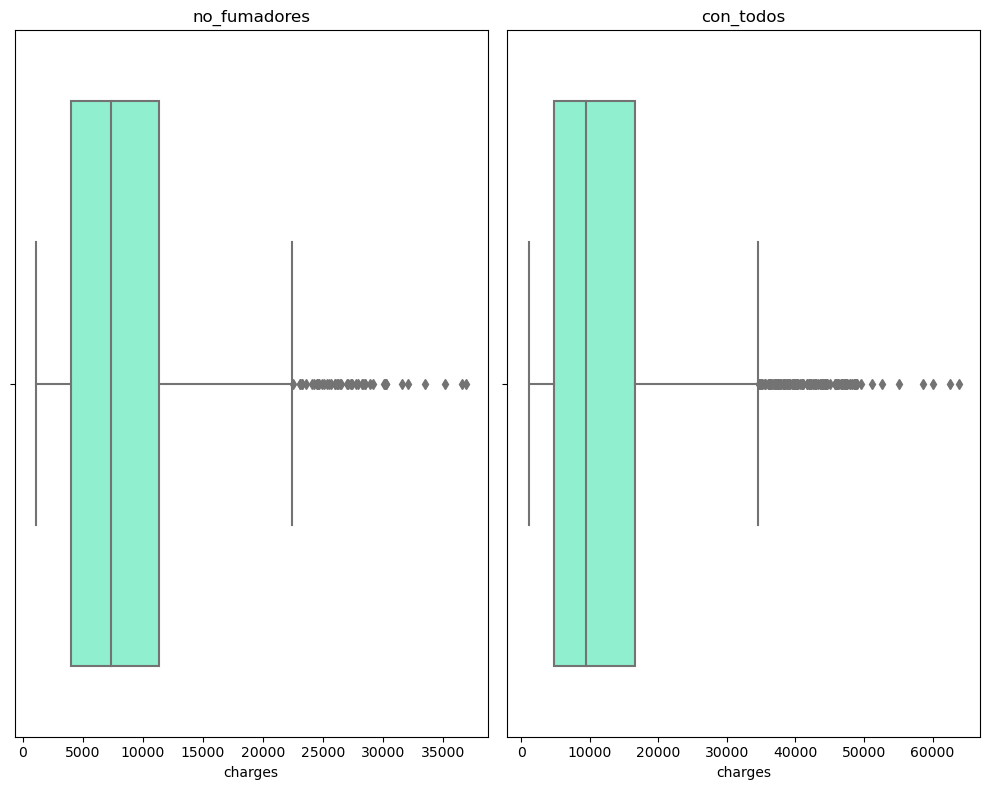

In [27]:
fig, axes = plt.subplots(1,2, figsize=(10,8))

axes = axes.flat

sns.boxplot(x = df_numericas_nofumadores['charges'], data = df_numericas_nofumadores, ax=axes[0], color = "aquamarine"); # para trazar una línea de densidad
sns.boxplot(x = df['charges'], data = df, ax=axes[1], color = "aquamarine")
axes[0].set_title('no_fumadores', fontsize = 12)    
axes[1].set_title('con_todos', fontsize = 12)    
plt.tight_layout()
plt.show()

Siguen teniendo muchos outlayers, así que vamos a quitar los outliers de la columna 'charges' .

In [28]:
sin_outliers_data= df[(df['charges'] < Q3 + outlier_step)]

In [29]:
sin_outliers_data['smoker'].unique()

array(['yes', 'no'], dtype=object)

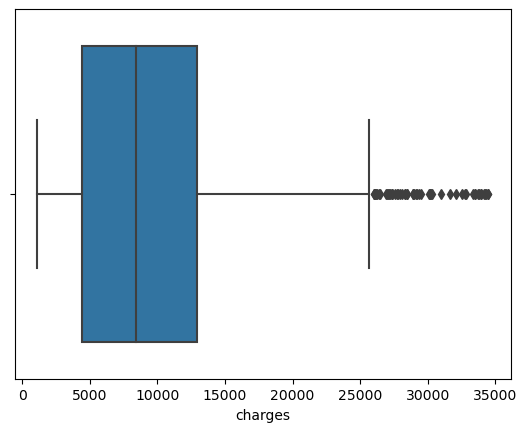

In [30]:
sns.boxplot(data=sin_outliers_data, x='charges');

Aunque nos vamos a  quedar con esta última división, antes vamos a comparar visualmente la variable respuesta con las distintas particiones que hemos hecho previamente.


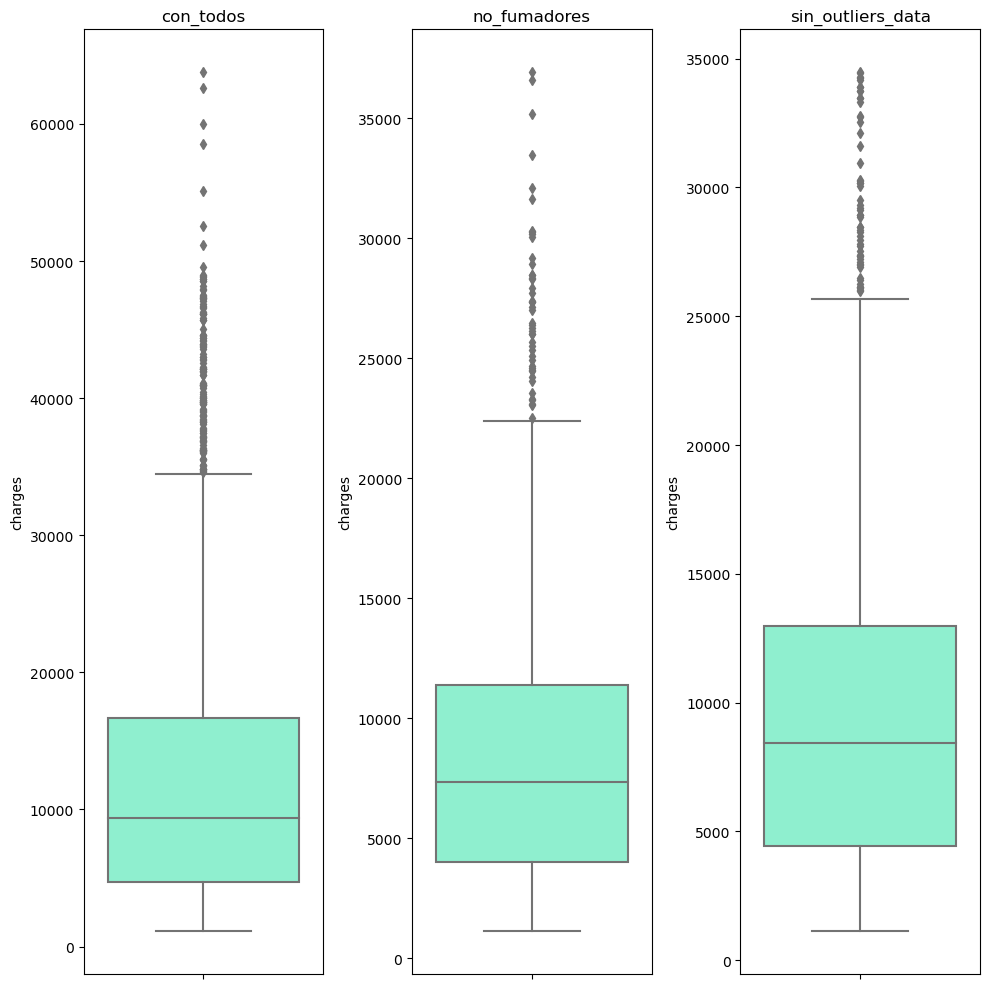

In [31]:
fig, axes = plt.subplots(1,3, figsize=(10,10))

axes = axes.flat

sns.boxplot(y = df['charges'], data = df, ax=axes[0], color = "aquamarine")
sns.boxplot(y = df_numericas_nofumadores['charges'], data = df_numericas_nofumadores, ax=axes[1], color = "aquamarine"); # para trazar una línea de densidad
sns.boxplot(y = sin_outliers_data['charges'], data = sin_outliers_data, ax=axes[2], color = "aquamarine")

axes[0].set_title('con_todos', fontsize = 12)
axes[1].set_title('no_fumadores', fontsize = 12)     
axes[2].set_title('sin_outliers_data', fontsize = 12)

plt.tight_layout()
plt.show()

Ahora analizamos la distribución de nuestra variable respuesta. 

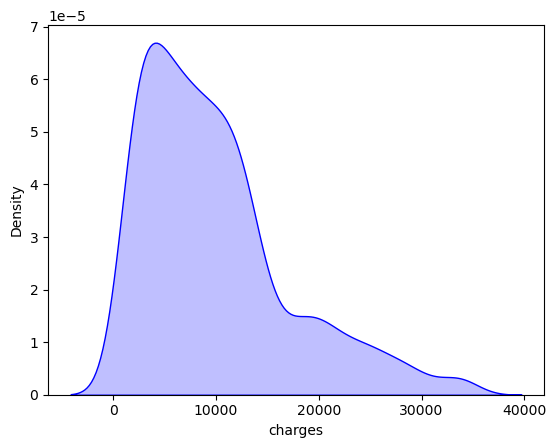

In [32]:
sns.distplot(
    sin_outliers_data["charges"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

Luego las de nuestra variables predictorias: 

In [33]:
sin_outliers_data.select_dtypes(include = np.number).describe().T




,count,mean,std,min,25%,50%,75%,max
age,1198.0,39.006678,14.062040,18.0000,26.000000,39.00000,51.0000,64.000
bmi,1198.0,30.094787,6.013044,15.9600,25.800000,29.73500,33.8200,53.130
children,1198.0,1.085142,1.214407,0.0000,0.000000,1.00000,2.0000,5.000
charges,1198.0,9934.671758,7240.216987,1121.8739,4418.591062,8411.75495,12955.3563,34472.841


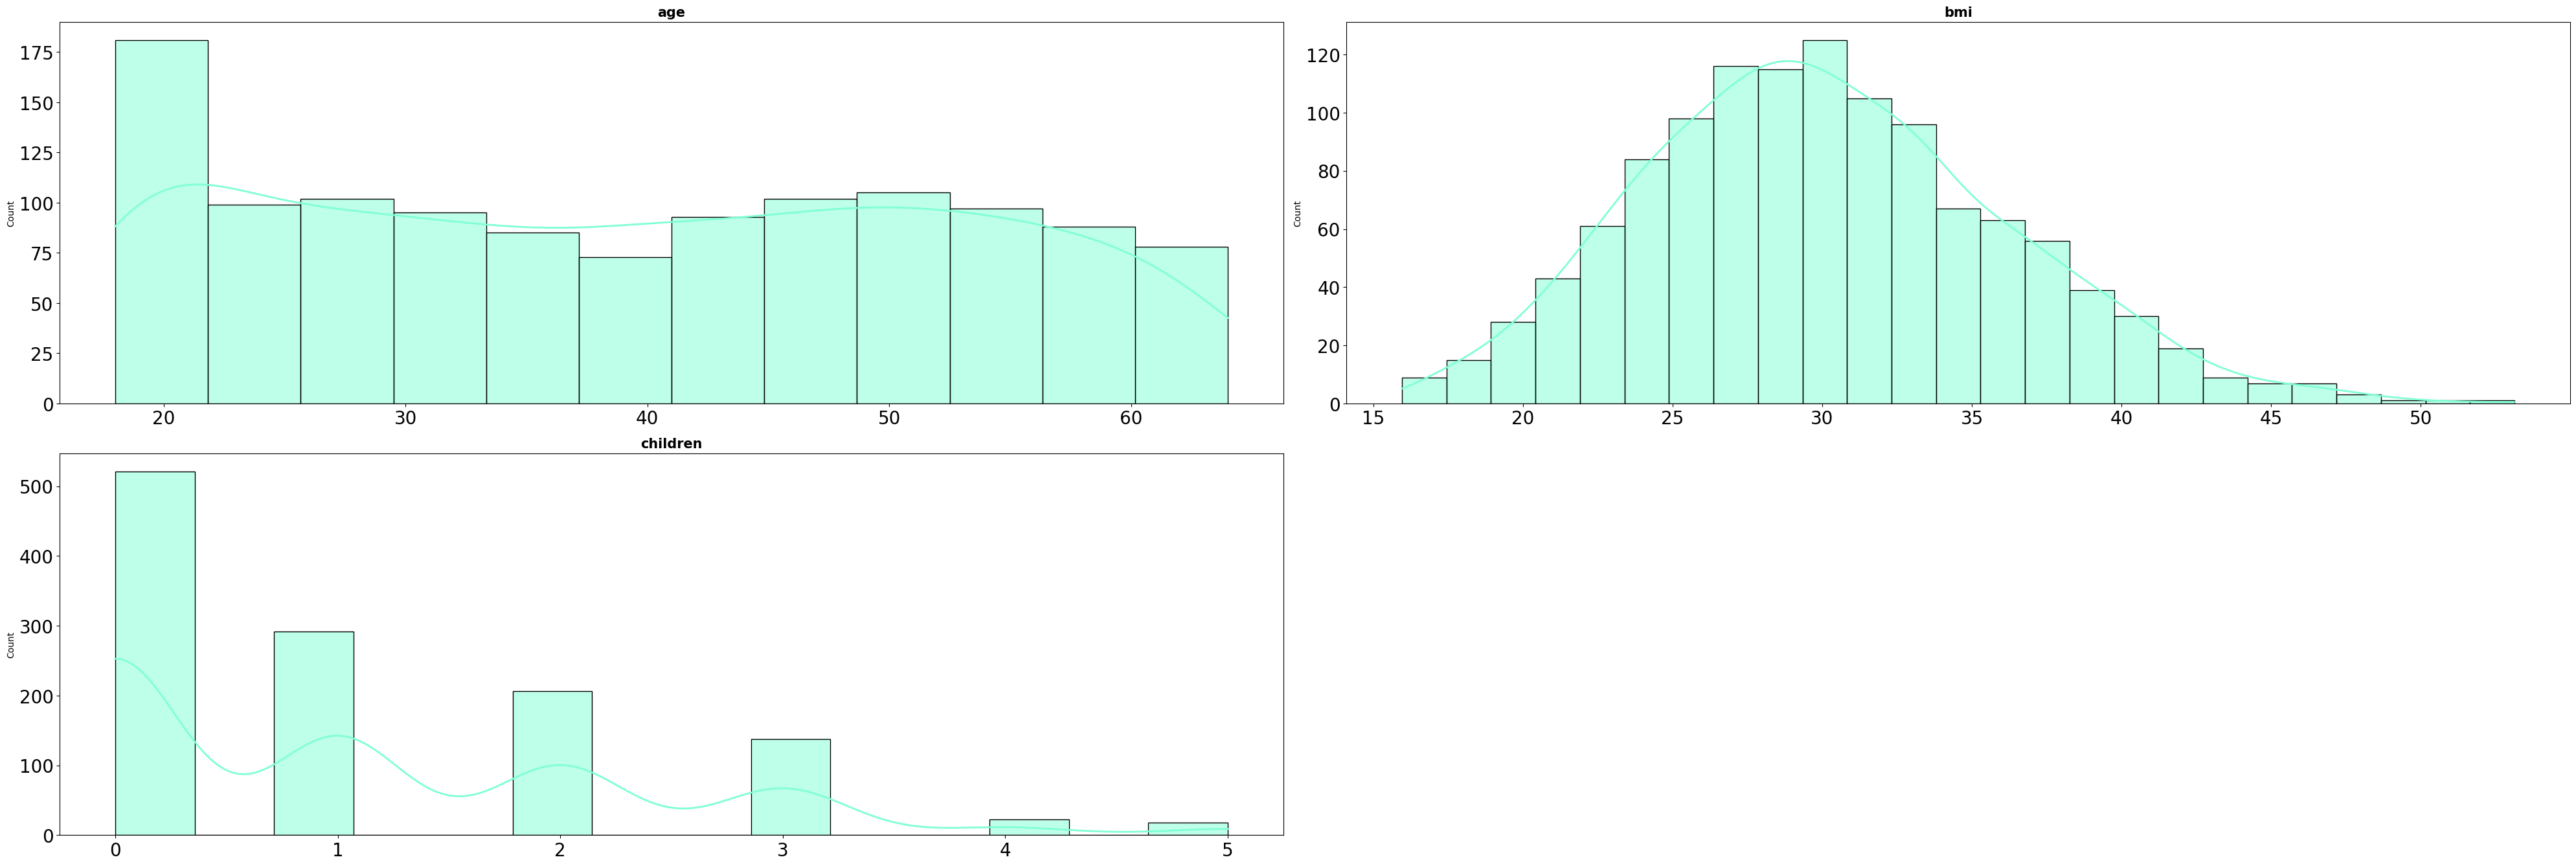

In [35]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (40, 20))


axes = axes.flat

columnas_numeric = sin_outliers_data.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = sin_outliers_data,
        x = colum,
        kde = True, 
        color = "aquamarine", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3]);

    


Vamos a ver la correlación de nuestros datos:

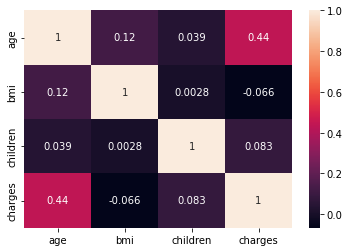

In [ ]:
sns.heatmap(sin_outliers_data.corr(), annot=True);

En el heatmap vemos que realmente no hay correlación entre ninguna de las variables numéricas. No parece que haya variables que den información redundante, pero tampoco variables predictoras con mucha relación con la respuesta.

Por último, vemos la relación entre las variables categóricas de nuestro dataframe y la variable respuesta.

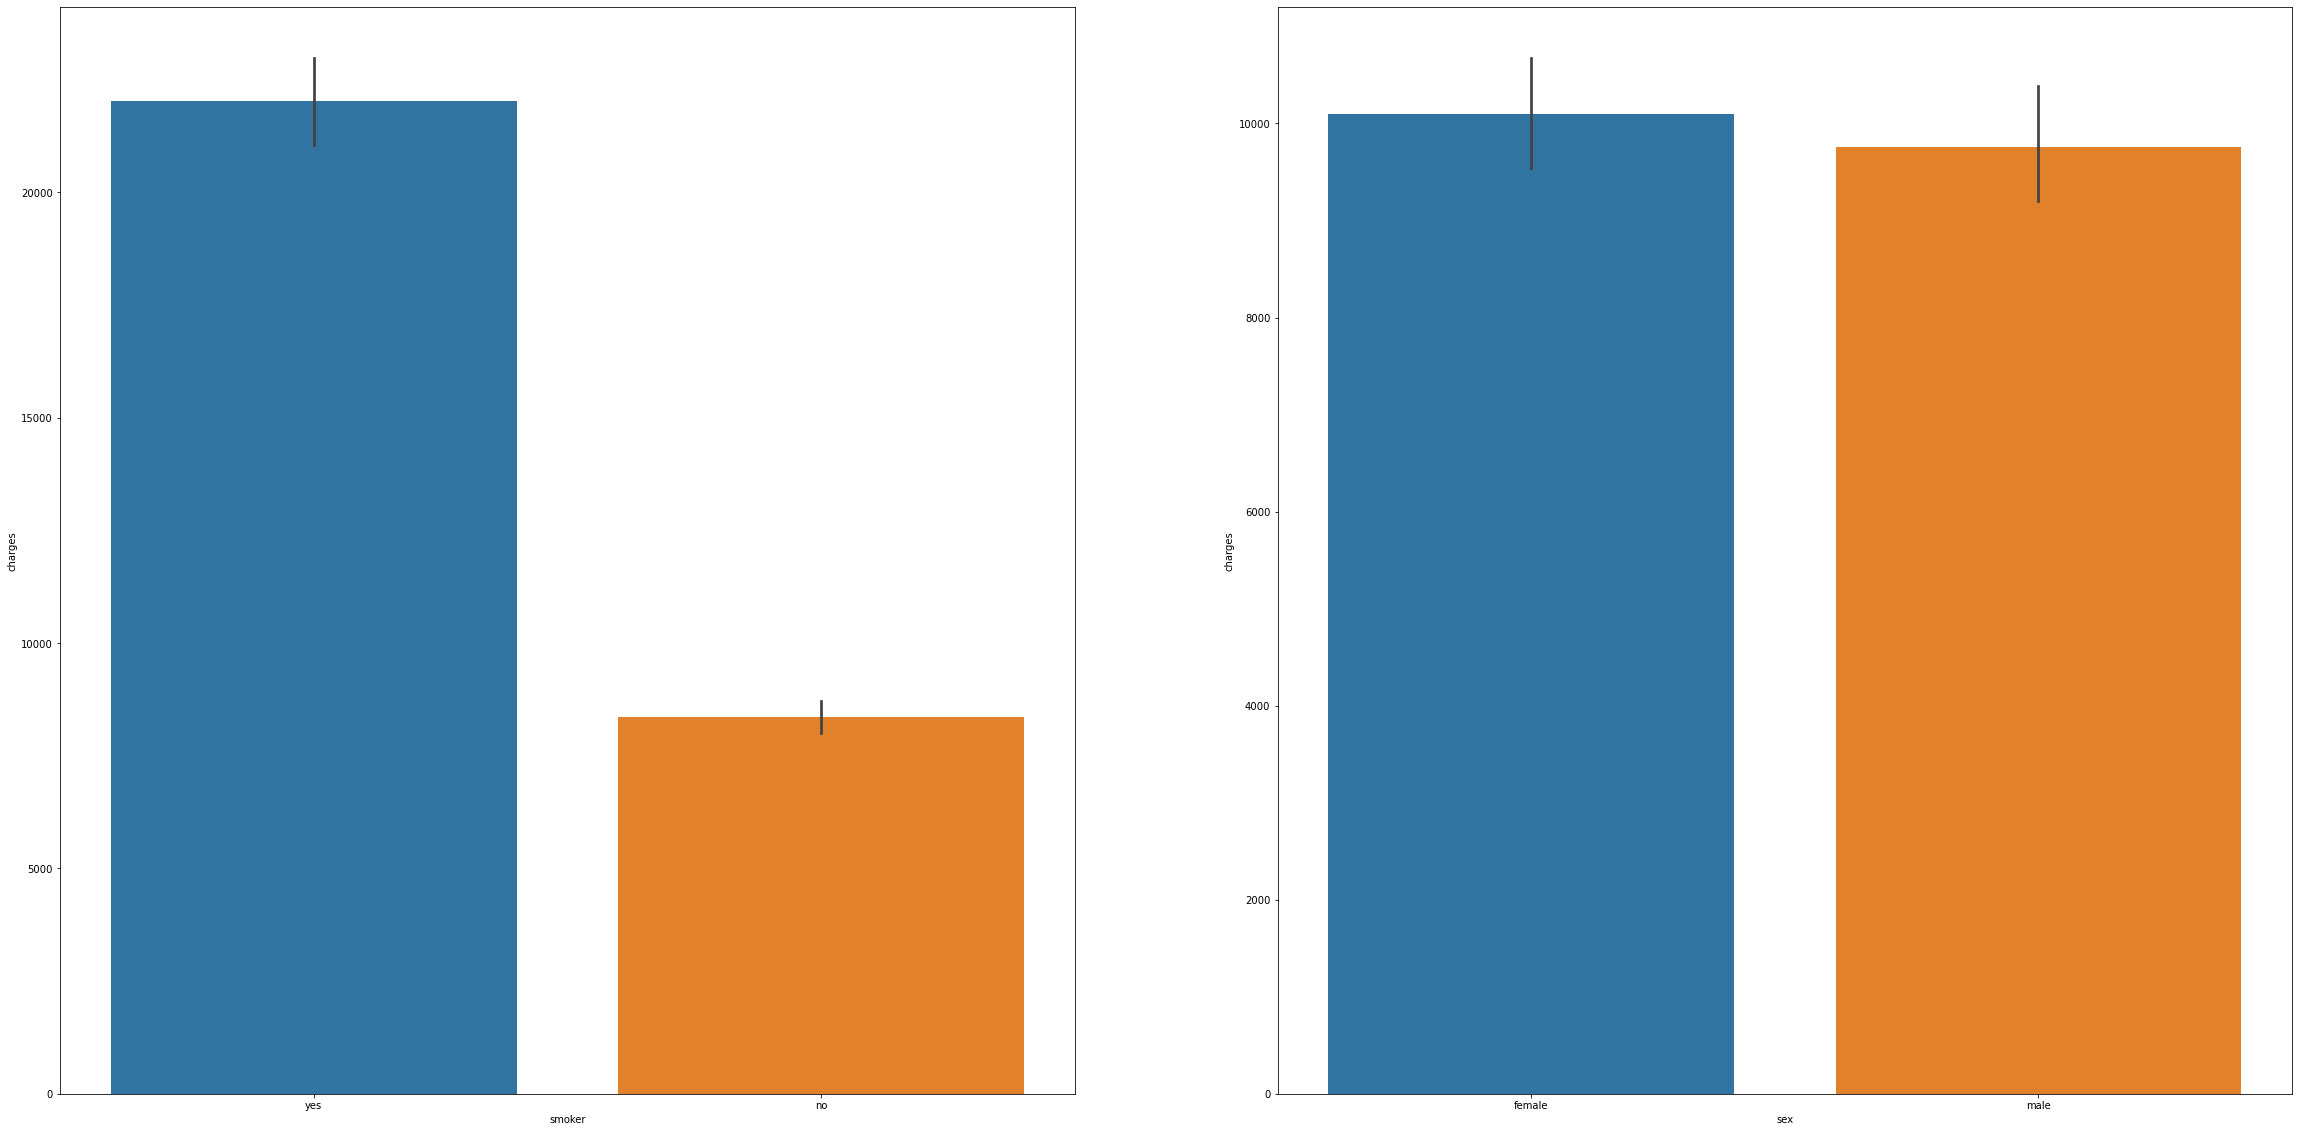

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (40, 20))
sns.barplot (x='smoker', y='charges', data= sin_outliers_data, ax= axes[0])
sns.barplot (x='sex', y='charges', data= sin_outliers_data, ax= axes[1]);

Parece que los fumadores pagan más por el seguro médico.
No parece que tenga mucho que ver el género con el coste médico.

<AxesSubplot:xlabel='region', ylabel='charges'>

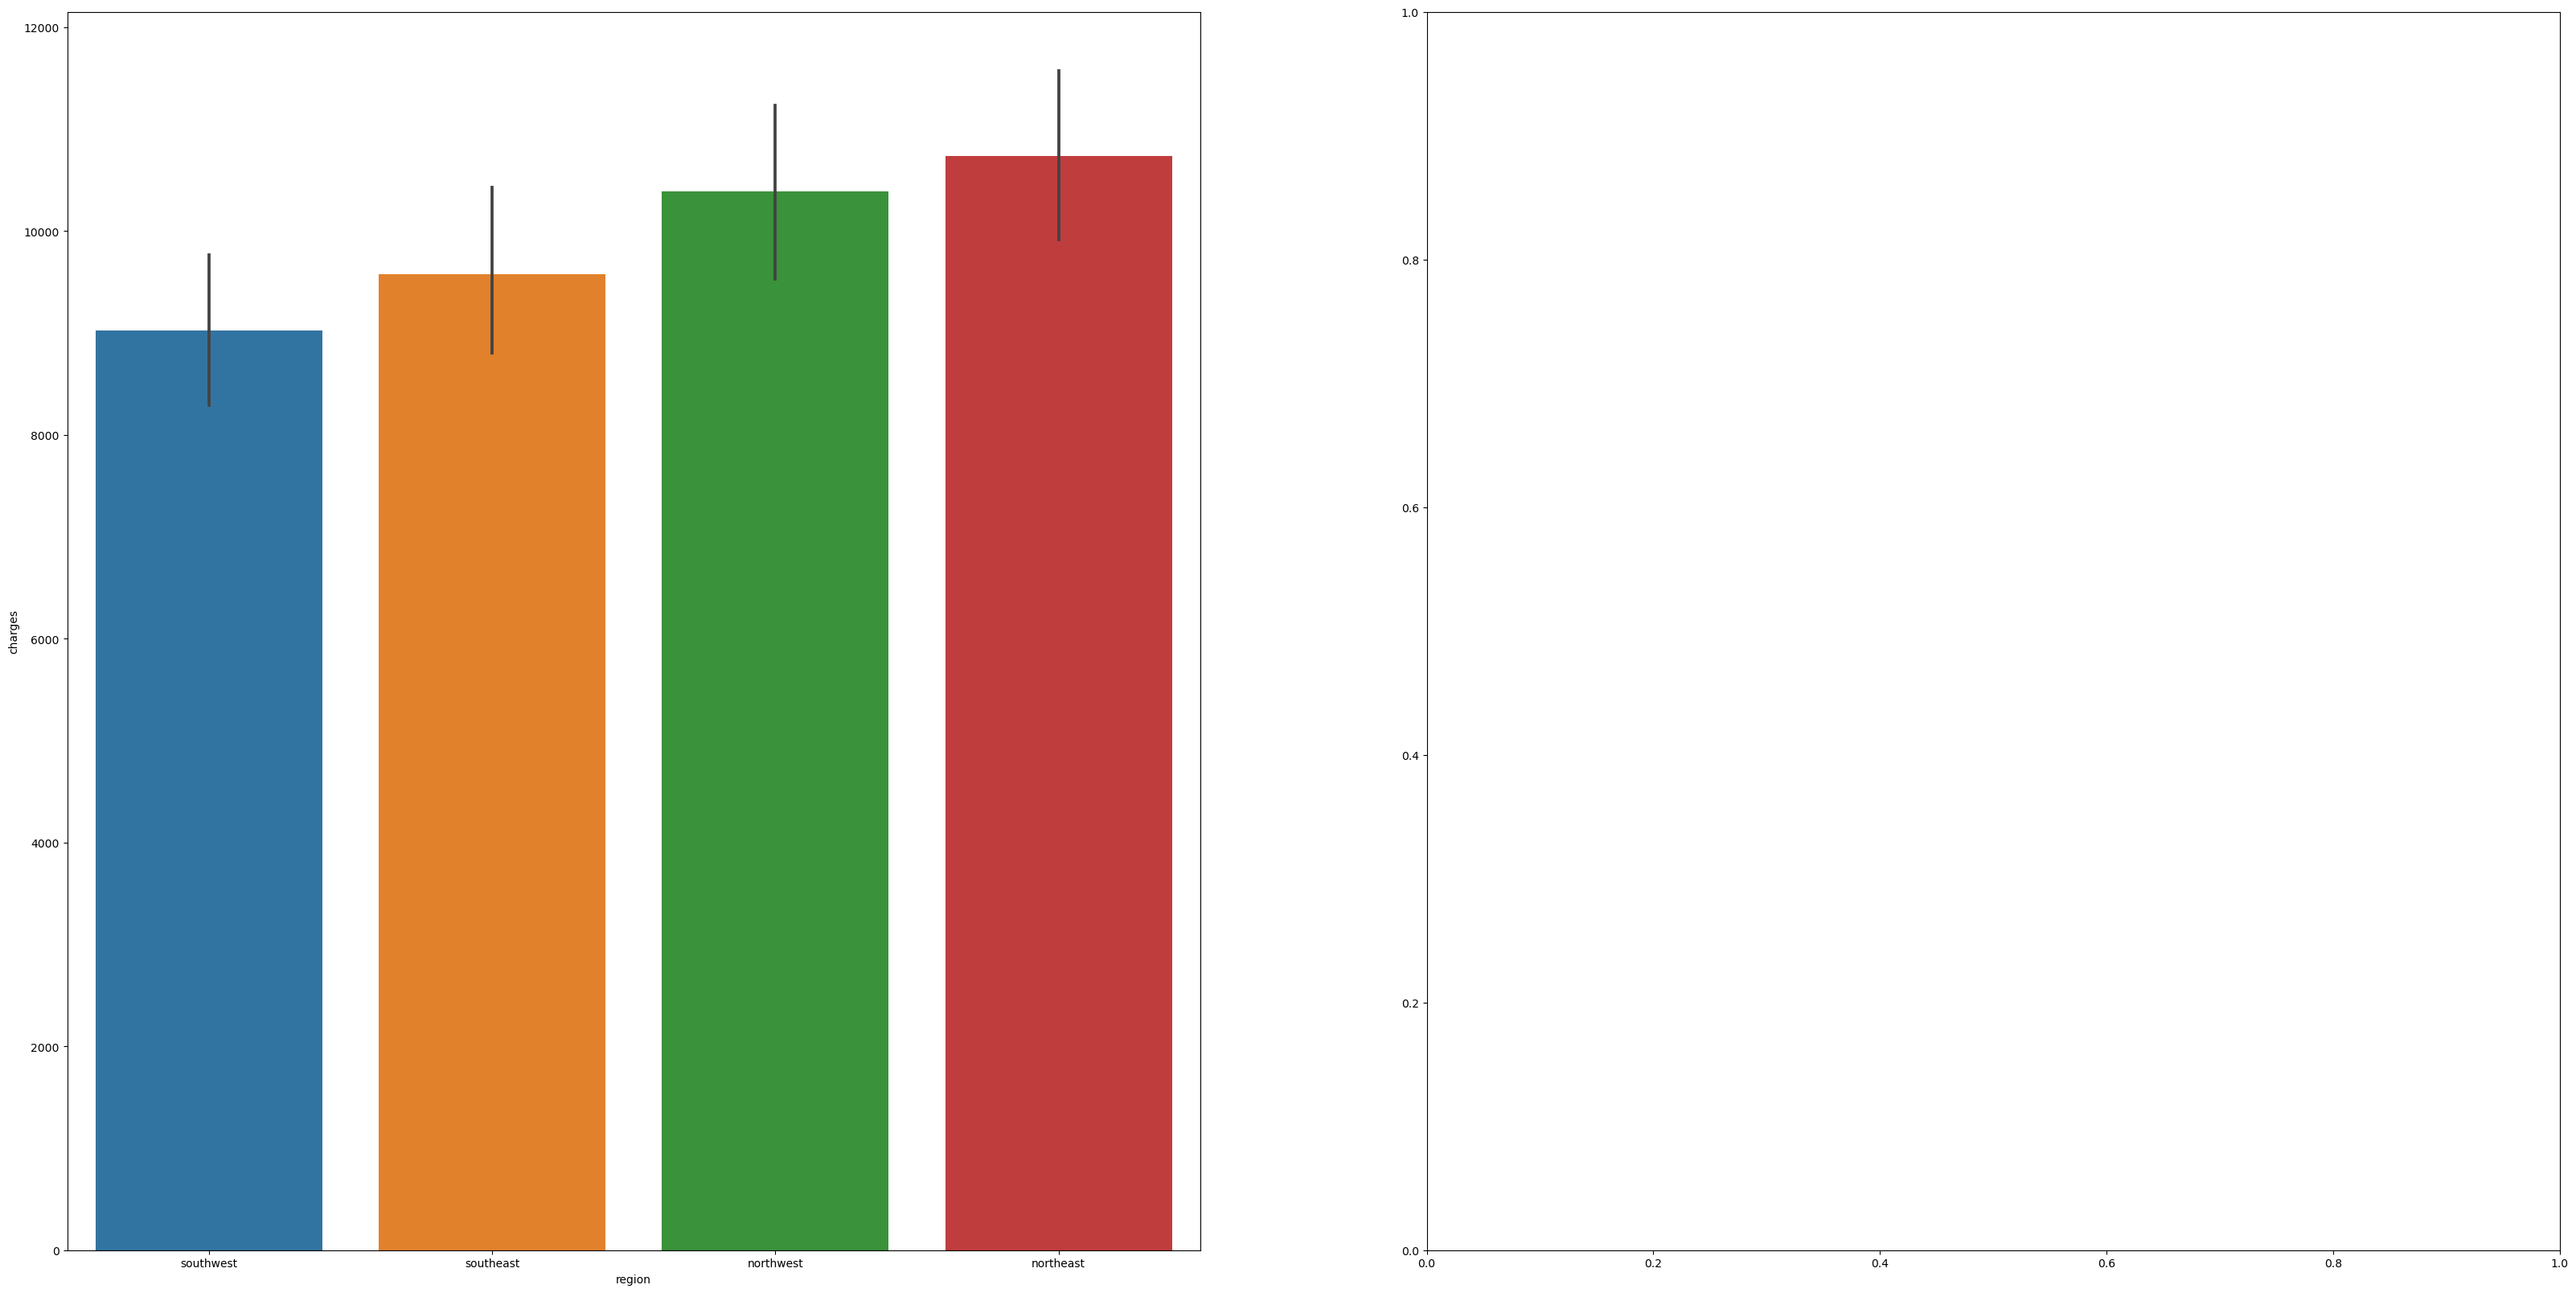

In [38]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (40, 20))
sns.barplot (x='region', y='charges', data= sin_outliers_data, ax= axes[0])


No parece que haya relación entre las regiones y el coste del seguro médico.

## Guardamos nuestro CSV con los datos de los no fumadores

In [ ]:
sin_outliers_data.to_csv('data/sin_outliers_data.csv')